# Regularization

# Difficulty with large number $d$ of features

Computation of $({\bf X}^T{\bf X})^{-1}$ for large $d$ is NaN if poorly conditioned.

# Regularization

$$
\hat{\bf\theta}
\ \ =\ \ 
({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y}
\quad\stackrel{\mbox{Regularization}}{\Rightarrow}\quad
\hat{\bf\theta}
\ \ =\ \ 
({\bf X}^T{\bf X}+\delta^2{\bf I})^{-1}{\bf X}^T{\bf y}
$$

# Prediction

$$
{\bf x}
\quad\Rightarrow\quad
{\bf x} = [1, {\bf x}]
\quad\Rightarrow\quad 
\hat y={\bf x}\hat{\bf \theta}
$$

In [1]:
import numpy as np

In [2]:
np.random.seed(123456789)

# np.argsort를 이용한 소트

In [3]:
x = np.random.uniform(0.,1.,5)
idx = np.argsort(x)
print(x)
print(idx)
print(x[idx])

[0.53283302 0.5341366  0.50955304 0.71356403 0.25699895]
[4 2 0 1 3]
[0.25699895 0.50955304 0.53283302 0.5341366  0.71356403]


# np.sort를 이용한 소트

In [4]:
y = np.sort(x)
print(x)
print(y)

[0.53283302 0.5341366  0.50955304 0.71356403 0.25699895]
[0.25699895 0.50955304 0.53283302 0.5341366  0.71356403]


# Regularization Example

In [5]:
# import modules
import numpy as np
from matplotlib import pyplot as plt
import os
%matplotlib inline

In [6]:
# make directory if not exist
if not os.path.isdir("img"):
    os.mkdir('img')

In [7]:
# generate sample
def generate_sample(n_train, n_test):
    x_train =  3 * np.random.normal(0.,1.,(n_train,1))
    y_train =  np.sin(x_train) + 0.2*x_train  + 0.2 * np.random.normal(0.,1.,(n_train,1))
    x_test = 3 * np.random.normal(0.,1.,(n_test,1))
    y_test = np.sin(x_test) + 0.2*x_test + 0.2 * np.random.normal(0.,1.,(n_test,1))
    return x_train, y_train, x_test, y_test

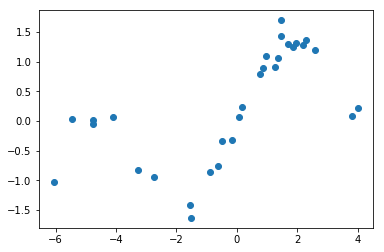

In [8]:
x_train, y_train, x_test, y_test = generate_sample(30,30)
plt.plot(x_train, y_train,'o')

In [9]:
# generate design matrix A
def generate_A(x, deg):
    N = x.shape[0]
    A = np.ones((N,1))
    for i in range(1, deg+1):
        A = np.append(A, np.power(x,i), axis=1)
    return A

In [10]:
x = np.arange(5).reshape(-1,1)
A = generate_A(x, deg=2)
print(x)
print(A)

[[0]
 [1]
 [2]
 [3]
 [4]]
[[ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]


In [11]:
# train and test
def train_and_test(x_train, y_train, x_test, y_test, deg=1, delta=0):
    n_train = x_train.shape[0]
    n_test = x_test.shape[0]
    n_features_plus_1 = x_train.shape[1]

    A = generate_A(x_train, deg)
    theta = np.linalg.inv(A.T@A + delta*np.eye(n_features_plus_1))@A.T@y_train
    y_train_pred = A@theta
    loss_train = np.sum((y_train - y_train_pred)**2) / n_train

    A = generate_A(x_test, deg)
    y_test_pred = np.dot(A, theta)
    loss_test = np.sum((y_test - y_test_pred)**2) / n_test

    return theta, y_train_pred, y_test_pred, loss_train, loss_test

In [12]:
theta, y_train_pred, y_test_pred, loss_train, loss_test = train_and_test(
    x_train, y_train, x_test, y_test, deg=3)

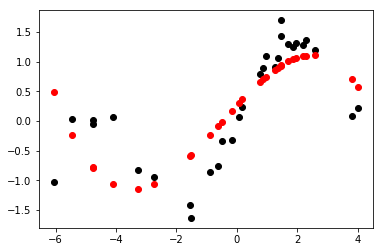

In [13]:
plt.plot(x_train,y_train,'ok')
plt.plot(x_train,y_train_pred,'or')

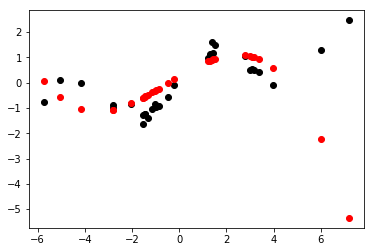

In [14]:
plt.plot(x_test,y_test,'ok')
plt.plot(x_test,y_test_pred,'or')

In [15]:
x_test

array([[-1.54623177],
       [-1.44855043],
       [-2.81038224],
       [-2.81753855],
       [-1.46549165],
       [ 1.36960582],
       [-1.02631452],
       [-5.72712006],
       [ 1.50702587],
       [ 1.44947823],
       [-1.30985763],
       [-1.1360483 ],
       [ 3.39713034],
       [ 2.98912714],
       [-1.53925739],
       [-2.04123843],
       [ 1.2162518 ],
       [ 1.2981163 ],
       [ 7.17464069],
       [-5.06268224],
       [-0.22721954],
       [ 6.00215381],
       [ 3.07762064],
       [ 3.15397506],
       [-4.15408399],
       [-0.87093226],
       [ 3.97753164],
       [-1.00382352],
       [ 2.80102529],
       [-0.48817073]])

In [16]:
# plot regularization
def plot_regularization(x_train, y_train, x_test, y_test, deltas):
    loss_train = []
    loss_test = []
    for i in range(len(deltas)):
        _, _, y_test_pred, l_train, l_test = train_and_test(
            x_train, y_train, x_test, y_test, deg=3, delta=deltas[i])
        plt.figure(i)
        plt.plot(x_test, y_test, 'ok', label='test data')
        plt.plot(x_test, y_test_pred, 'or', label='test prediction')
        plt.legend()
        plt.savefig("img/fig {}.png".format(i))
        # plt.show()
        loss_train.append(l_train)
        loss_test.append(l_test)

    plt.figure(len(deltas))
    plt.plot(np.log(deltas), loss_train, 'o-k', label='train loss')
    plt.plot(np.log(deltas), loss_test, 'o-r', label='test loss')
    plt.xlabel('log(delta)')
    plt.legend()
    plt.savefig("img/fig {}.png".format(len(deltas)))
    # plt.show()

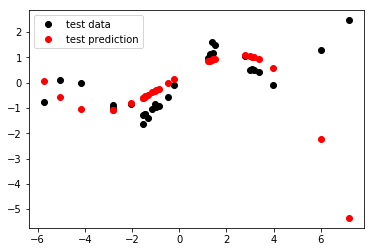

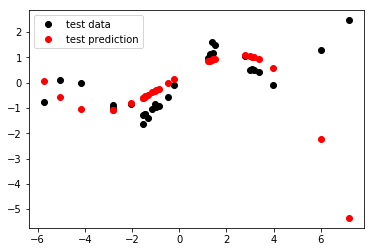

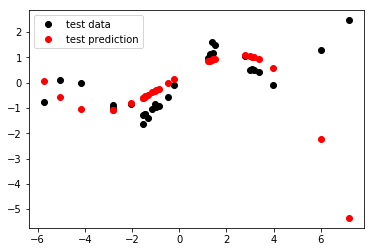

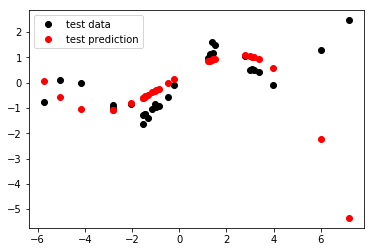

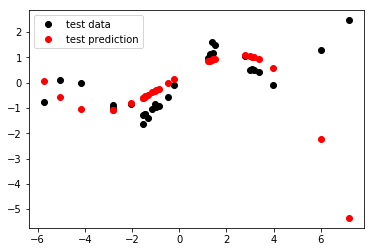

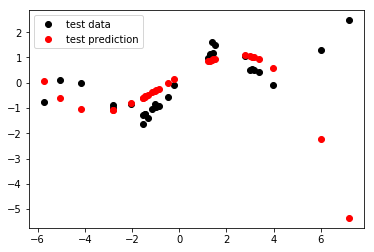

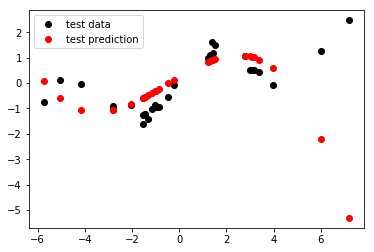

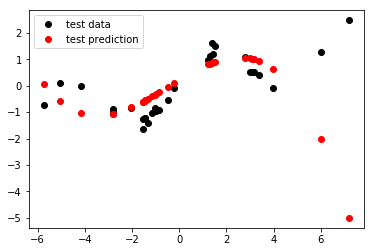

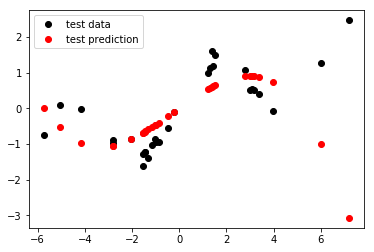

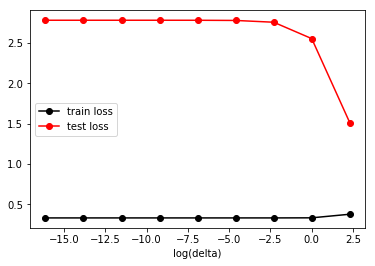

In [17]:
plot_regularization(
    x_train, y_train, x_test, y_test, deltas=[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10])

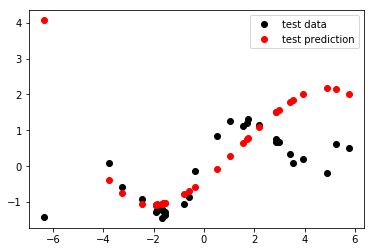

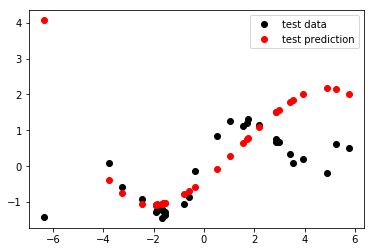

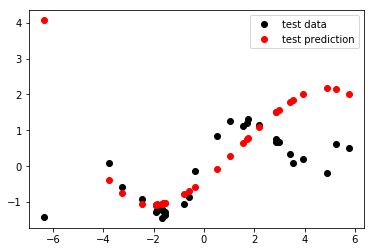

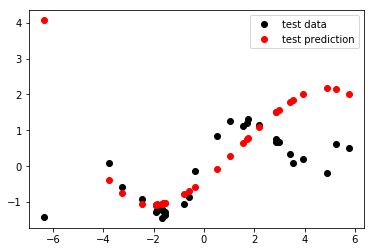

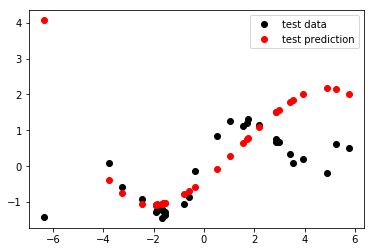

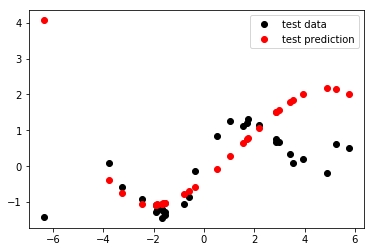

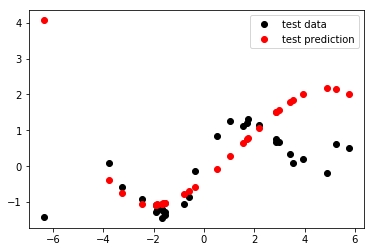

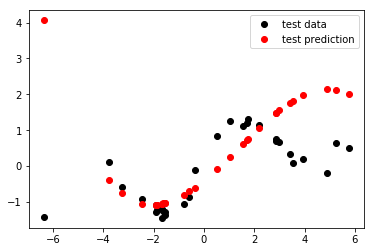

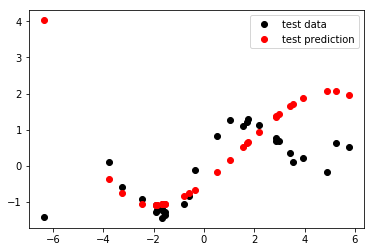

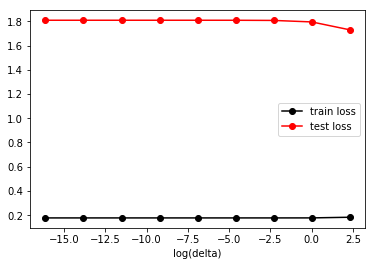

In [18]:
if __name__ == '__main__':
    n_train = 30
    n_test = 30
    max_deg = 9

    x_train, y_train, x_test, y_test = generate_sample(n_train, n_test)
    plot_regularization(
    x_train, y_train, x_test, y_test, deltas=[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10])

# Exercise

Modify the above code so that the predicted y values are joined by line segments.